In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [ ]:
# Create a binary classification dataset
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=42)

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Set random seed
tf.random.set_seed(52)

# Build the model
my_model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='leaky_relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [ ]:
# Compile the model
my_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 loss=tf.keras.losses.BinaryFocalCrossentropy(),
                 metrics=['accuracy'])

# Train the model
history = my_model.fit(X_train, y_train, epochs=150, verbose=0, validation_data=(X_test, y_test))


In [ ]:
# Evaluate the model
test_loss, test_accuracy = my_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9158 - loss: 0.0585 
Test accuracy: 91.00%


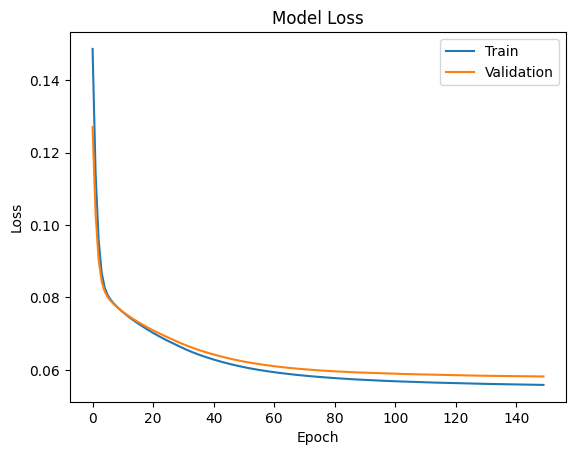

In [ ]:
# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()